# <p style="text-align:center;">**GEOSALES PT X**</p>

**Proses :**
- Update realisasi omzet `SalesInvoices_PT_X_2024`
- Input lokasi berupa Kota atau Kawasan Perkotaan. 
    - "Yogyakarta, Indonesia"
    - "Jakarta, Indonesia"
    - "New York, USA"
    - "Bangkok, Thailand"
- Save dan close file yang diinput pada file `01. Input_Target penjualan_Perguruan Tinggi`
- Jalankan Python, klik `Run All`
- Buka `03. GeoSales Visualisasi Target dan Realisasi Penjualan` untuk melihat rekap universitas dalam format excel
- Buka `04. GeoSales Visualisasi Target dan Realisasi Penjualan` untuk melihat visualisasi universitas

In [1]:
# pip install lmdb --only-binary :all:


In [2]:
# pip install --no-cache-dir osmnx


# Target Perguruan Tinggi

In [3]:
import pandas as pd
pt = pd.read_excel('01. Input_Target penjualan_Perguruan Tinggi.xlsx')
pt


,area,titik,status
0,Solo,Solo Indonesia,target
1,Medan,Medan Indonesia,target
2,Jakarta,Jakarta Indonesia,target
3,malang,malang Indonesia,target
4,bali,bali Indonesia,target
5,Kediri,Kediri Indonesia,target


In [4]:
import osmnx as ox
import pandas as pd

# Asumsikan 'target' adalah DataFrame yang sudah difilter
target = pt[pt['status'] == 'target'][['titik']]

# Membuat list untuk menyimpan hasil sebelum menggabungkannya ke DataFrame
results_list = []

# Mendapatkan universitas di setiap wilayah yang ada di DataFrame
for i, row in target.iterrows():
    area = row['titik']  # Mengambil nama wilayah dari kolom 'titik'
    
    try:
        # Mengambil data geometri universitas dari area tersebut
        gdf = ox.geometries_from_place(area, tags={'amenity': 'university'})
        
        # Menampilkan nama dan poligon universitas (jika ada)
        if not gdf.empty:
            # Jika kolom 'name' tidak ada, tambahkan kolom 'name' dengan None
            if 'name' not in gdf.columns:
                gdf['name'] = None
            
            # Tambahkan kolom 'area' untuk menyimpan nama wilayah
            gdf['area'] = area
            
            # Menyimpan hasil di list sementara
            results_list.append(gdf)
        else:
            print(f'Tidak ditemukan universitas di {area}')
    except Exception as e:
        print(f"Error saat memproses area {area}: {e}")
        continue

# Menggabungkan semua hasil dari list menjadi satu DataFrame
result_df = pd.concat(results_list, ignore_index=True)

result_df


C:\Users\irma.manik\AppData\Local\Temp\ipykernel_10636\79192410.py:16: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  gdf = ox.geometries_from_place(area, tags={'amenity': 'university'})
C:\Users\irma.manik\AppData\Local\Temp\ipykernel_10636\79192410.py:16: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  gdf = ox.geometries_from_place(area, tags={'amenity': 'university'})
C:\Users\irma.manik\AppDat

,amenity,name,geometry,addr:city,addr:postcode,addr:street,description,email,fax,internet_access,...,military,operator:wikidata,denomination,religion,landuse,barrier,layer,designation,addr:neighbourhood,addr:province
0,university,Universitas Islam Batik Surakarta,POINT (110.79521 -7.56261),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,university,Universitas Islam Batik Surakarta,POINT (110.79452 -7.56375),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,university,ITS PKU Muhammadiyah Surakarta,POINT (110.81619 -7.53404),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,university,Universitas Tunas Pembangunan,POINT (110.83352 -7.55113),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,university,SMP N 07 Surakarta,POINT (110.83291 -7.55031),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,university,Undiksa,"POLYGON ((115.08518 -8.11225, 115.08572 -8.111...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
430,university,NaN,"POLYGON ((115.08862 -8.12039, 115.08932 -8.120...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431,university,Universitas Mahasaraswati Denpasar,"POLYGON ((115.32313 -8.53959, 115.32303 -8.539...",Gianyar,NaN,Jalan Manik,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432,university,Universitas Brawijaya Kampus 3,"POLYGON ((111.99798 -7.78141, 111.99867 -7.781...",NaN,NaN,NaN,NaN,NaN,NaN,wlan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
target_pasar = result_df.copy()


In [6]:
target_pasar = result_df.reset_index().dropna(subset='name') 
target_pasar.head()


,index,amenity,name,geometry,addr:city,addr:postcode,addr:street,description,email,fax,...,military,operator:wikidata,denomination,religion,landuse,barrier,layer,designation,addr:neighbourhood,addr:province
0,0,university,Universitas Islam Batik Surakarta,POINT (110.79521 -7.56261),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,university,Universitas Islam Batik Surakarta,POINT (110.79452 -7.56375),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,university,ITS PKU Muhammadiyah Surakarta,POINT (110.81619 -7.53404),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,university,Universitas Tunas Pembangunan,POINT (110.83352 -7.55113),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,university,SMP N 07 Surakarta,POINT (110.83291 -7.55031),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
hasil = target_pasar.drop(columns=['nodes', 'geometry'])
hasil .to_excel('03. GeoSales Visualisasi Target dan Realisasi Penjualan.xlsx')


# Realisasi Penjualan

In [8]:
import pandas as pd
df = pd.read_csv('SalesInvoices_PT_X_2024.csv')


In [9]:
# Removing extra quotes from Latitude and Longtitude (or whichever column needs it)
df['POAddressLine3'] = df['POAddressLine3'].replace("'", "").astype(float)
df['POAddressLine4'] = df['POAddressLine4'].astype(float)

# Checking if the coordinates are valid (latitude range: -90 to 90, longitude range: -180 to 180)
valid_lat = df['POAddressLine3'].between(-90, 90)
valid_lon = df['POAddressLine4'].between(-180, 180)

# Create a report of invalid latitude or longitude
invalid_lat_lon = df[~valid_lat | ~valid_lon]

# Saving the dataframe to CSV
df.to_csv('SalesInvoices_PT_X_2024.csv', index=False)

# Display the invalid entries
display(invalid_lat_lon)

# If you want to display the first few rows of the dataframe
display(df.head()
)


,ContactName,EmailAddress,POAddressLine1,POAddressLine2,POAddressLine3,POAddressLine4,POCity,PORegion,POPostalCode,POCountry,...,TaxType,TaxAmount,TrackingName1,TrackingOption1,TrackingName2,TrackingOption2,Currency,Type,Sent,Status


,ContactName,EmailAddress,POAddressLine1,POAddressLine2,POAddressLine3,POAddressLine4,POCity,PORegion,POPostalCode,POCountry,...,TaxType,TaxAmount,TrackingName1,TrackingOption1,TrackingName2,TrackingOption2,Currency,Type,Sent,Status
0,CV. CAHAYA SEKAR SAKTI,NaN,"JL. HALMAHERA RAYA NO.40, KARANGTEMPEL,",SEMARANG TIMUR,-6.972263,110.435146,SEMARANG,JAWA TENGAH,NaN,INDONESIA,...,PPN,242202.12,Unit,Tekstil,NaN,NaN,IDR,Sales invoice,Unsent,Paid
1,PT DAN LIRIS,NaN,"Banaran, Grogol",Grogol,-7.602244,110.810200,Sukoharjo,Jawa Tengah,57552.0,IDN,...,PPN,2824324.32,Unit,Tekstil,NaN,NaN,IDR,Sales invoice,Unsent,Awaiting Payment
2,PT DAN LIRIS,NaN,"Banaran, Grogol",Grogol,-7.602244,110.810200,Sukoharjo,Jawa Tengah,57552.0,IDN,...,PPN,1843243.24,Unit,Tekstil,NaN,NaN,IDR,Sales invoice,Unsent,Awaiting Payment
3,PT DAN LIRIS,NaN,"Banaran, Grogol",Grogol,-7.602244,110.810200,Sukoharjo,Jawa Tengah,57552.0,IDN,...,PPN,3686486.49,Unit,Tekstil,NaN,NaN,IDR,Sales invoice,Unsent,Awaiting Payment
4,KING GARMENT,NaN,JL. Kedung Anyar VII/41-A RT 006 RW 003,Sawahan,-7.263013,112.721171,Surabaya,Jawa Timur,60251.0,IDN,...,PPN,3519108.11,Unit,Tekstil,NaN,NaN,IDR,Sales invoice,Unsent,Paid


In [10]:
import folium
m = folium.Map(location=[-7.7956, 110.3695], zoom_start=7)

# Tambahkan GeoJSON layer untuk batas area
folium.GeoJson(
    target_pasar,
    tooltip=folium.GeoJsonTooltip(fields=["name"]),
    style_function=lambda x: {'fillColor': 'none', 'color': 'purple', 'weight': 3},
    #zoom_on_click=True
).add_to(m)

# Data realisasi penjualan
penjualan = df

# Menambahkan titik berdasarkan realisasi penjualan
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['POAddressLine3'], row['POAddressLine4']],
        popup=f"{row['ContactName']}: {row['PORegion']} ({row['POAddressLine1']})",
        color='orange',
        fill= True,
    ).add_to(m)


# Data kepadatan penduduk di provinsi Pulau Jawa
data_kepadatan = [
    {"provinsi": "DKI Jakarta", "koordinat": [-6.2088, 106.8456], "penduduk": 15957, "kategori": "Sangat Padat"},
    {"provinsi": "Banten", "koordinat": [-6.4058, 106.0640], "penduduk": 1232, "kategori": "Sedang"},
    {"provinsi": "Jawa Barat", "koordinat": [-6.8895, 107.6405], "penduduk": 1411, "kategori": "Sedang"},
    {"provinsi": "Jawa Tengah", "koordinat": [-7.1500, 110.1403], "penduduk": 1113, "kategori": "Sedang"},
    {"provinsi": "DI Yogyakarta", "koordinat": [-7.7956, 110.3695], "penduduk": 1158, "kategori": "Sedang"},
    {"provinsi": "Jawa Timur", "koordinat": [-7.7610, 112.6459], "penduduk": 850, "kategori": "Jarang"}
]

# Menambahkan marker ke peta berdasarkan kepadatan penduduk
for data in data_kepadatan:
    color = 'red' if data["kategori"] == "Sangat Padat" else 'lightgray' if data["kategori"] == "Padat" else 'green'
    folium.CircleMarker(
        location=data["koordinat"],
        popup=f"{data['provinsi']}: {data['penduduk']} penduduk/km² ({data['kategori']})",
        color='blue' if data['kategori'] == 'Sangat Padat'else 'green' if data['kategori'] == 'Sedang' else 'red',
        fill= True,
        
    ).add_to(m)
    
# Tambahkan judul peta
title = "<h3>GeoSales: Visualisasi Target dan Realisasi Penjualan</h3>"
m.get_root().html.add_child(folium.Element(title))

# Tampilkan layer control pada peta
folium.LayerControl().add_to(m)

# Menampilkan peta
m.save("04. GeoSales Visualisasi Target dan Realisasi Penjualan.html")
m



# Analisa Omzet

In [11]:
omset_area= pd.pivot_table(df,index=['PORegion','ContactName'], values='Total', aggfunc='mean')
omset_area = omset_area.reset_index().sort_values(by='Total',ascending=False)
omset_area.head()


,PORegion,ContactName,Total
14,Jawa Tengah,CV WARIS TUNGGA,1.397923e+08
24,Jawa Tengah,SUKARNO,1.331463e+08
11,Jawa Tengah,BAKHTIAR EFFENDI,1.308750e+08
2,DKI Jakarta,PT AMRA APPAREL INDUSTRIES,1.082299e+08
19,Jawa Tengah,PT DAN LIRIS,1.015391e+08


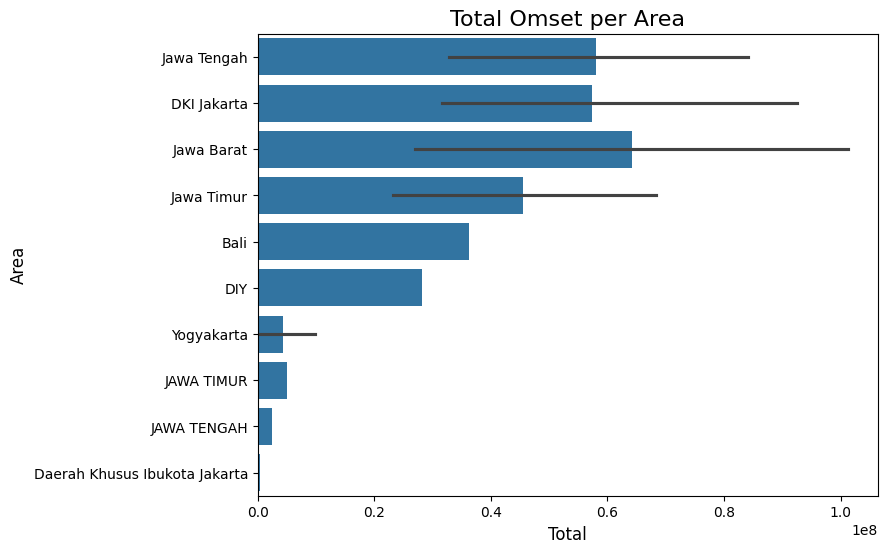

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat barplot dengan seaborn dan data yang sudah diurutkan
plt.figure(figsize=(8,6))
sns.barplot(data=omset_area, y='PORegion', x='Total')

# Menambahkan judul dan label sumbu
plt.title('Total Omset per Area', fontsize=16)
plt.xlabel('Total', fontsize=12)
plt.ylabel('Area', fontsize=12)

# Menampilkan plot
plt.show()
